제시된 한국어 리뷰 data를 이용하여
탐색적 데이터 분석 (EDA)를 하시오.

In [1]:
import codecs
import pandas as pd
with codecs.open('ratings_test.txt',encoding='utf-8') as f:
    data=[i.split('\t') for i in f.read().splitlines()]
    m=data[0]
    data=data[1:]
p_data=pd.DataFrame(data,columns=m)
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [2]:
df=pd.DataFrame()
df['document']=p_data['document'].values
df['label']=p_data['label'].values
df

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


1.결측치확인

In [3]:
import numpy as np
df.isna().sum()

document    0
label       0
dtype: int64

2.중복제거

In [4]:
np.unique(df)

array(['', '!!', '!!!!', ..., '힙합에 똥칠하는 찐따 둘이서 힙합을 능욕하는 모습을 그린영화.',
       '힛걸에, 힛걸을 위한, 힛걸의', '龍頭蛇尾 過猶不及 針小棒大 키리시마는 맥거핀~'], dtype=object)

In [5]:
df.document.nunique() # 개수 확인

49158

In [6]:
df=df.drop_duplicates(subset=['document'])
df

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


3. 한글아닌 요소 제거

In [7]:
df['document']=df.document.str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]','')

C:\Users\류성빈\AppData\Local\Temp/ipykernel_16928/2985358417.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document']=df.document.str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]','')
C:\Users\류성빈\AppData\Local\Temp/ipykernel_16928/2985358417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['document']=df.document.str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]','')


In [8]:
df['document']=df.document.str.replace('^ +','') # 시작지점 앞 공백 제거

C:\Users\류성빈\AppData\Local\Temp/ipykernel_16928/221906412.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document']=df.document.str.replace('^ +','') # 시작지점 앞 공백 제거
C:\Users\류성빈\AppData\Local\Temp/ipykernel_16928/221906412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['document']=df.document.str.replace('^ +','') # 시작지점 앞 공백 제거


In [9]:
df['document']=df.document.replace('',np.nan) #공백을 nan으로 지정

C:\Users\류성빈\AppData\Local\Temp/ipykernel_16928/423754258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['document']=df.document.replace('',np.nan) #공백을 nan으로 지정


In [10]:
df=df.dropna()
df

,document,label
0,굳 ㅋ,1
2,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,음악이 주가 된 최고의 음악영화,1
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [36]:
s_w=['은','는','이','가','를','들','에게','의','를','도','으로','만','라서','한다','함','네','이래','하게','한','어','요','에','을','에서','이다','다','영화','너무','하는','하고','정말']

In [37]:
from konlpy.tag import Okt
tk=Okt()
end_d=[]

for i in df['document']:
    l=[]
    
    tk_m=tk.morphs(i)
    for j in tk_m:
        if j not in s_w:
            l.append(j)
    l2=[]
    합=""
    for k in l:
        합=합+' '+k
    l2.append(합)
    end_d.append(l2)
    
end_k=[]
for i in df['label']:
    k=[]
    k.append(i)
    end_k.append(k)

    
df_d=pd.DataFrame(end_d,columns=['document'])
df_d['label']=pd.DataFrame(end_k)
df_d


,document,label
0,굳 ㅋ,1
1,뭐 야 평점 나쁘진 않지만 점 짜 리 더 더욱 아니잖아,0
2,지루하지는 않은데 완전 막장 임 돈 주고 보기 에는,0
3,아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기 불편하게 하죠,0
4,음악 주가 된 최고 음악,1
...,...,...
48847,오랜 평점 로 긴 했네 ㅋㅋ 킹왕짱 쌈뽕 만났습니다 강렬하게 육 쾌함,1
48848,의지 박약 이나 하는거다 탈영 일단 주인공 김대희 닮았고 이등병 찐 따,0
48849,그림 좋고 완성 도도 높았지만 보는 내내 불안하게 만든다,0
48850,절대 봐 서는 안 될 재미 없고 기분 잡 치고 세트 장 해먹,0


In [38]:
df_d.isna().sum()

document    0
label       0
dtype: int64

In [39]:
df_d.isna().head(20)

,document,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [40]:
from sklearn.feature_extraction.text import CountVectorizer#특정단어가 얼만큼 입력되었는지 확ㅇ인하기위한 것
from wordcloud import WordCloud,STOPWORDS 
from bs4 import BeautifulSoup#html 파서해서 단어만 남게함 /데이터 정리
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation # 데이터 구성상에서 글자에 대응대는 부호들을 의미한다. 이를 배제할때 사용하기위해 불러옴
from nltk import pos_tag# 글자마다 키워드값 제시
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df_d.label.replace('1',1,inplace=True)
df_d.label.replace('0',0,inplace=True)
#df_d.label=df_d.label.astype(int)

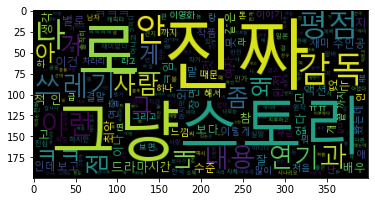

In [42]:
wc=WordCloud(font_path='malgun',max_words=2000).generate(' '.join(df_d[df_d.label==0].document))
plt.imshow(wc)

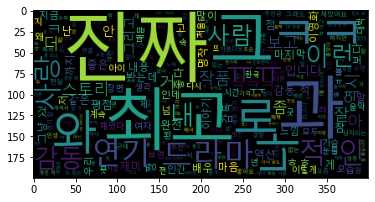

In [43]:
wc=WordCloud(font_path='malgun',max_words=2000).generate(' '.join(df_d[df_d.label==1].document))
plt.imshow(wc)

In [44]:
t_l_0=df_d[df_d.label==0]['document'].str.len()
t_l_1=df_d[df_d.label==1]['document'].str.len()
t_l_1

0         4
4        14
8        37
9        17
11       61
         ..
48843    10
48844    20
48845    36
48846     6
48847    39
Name: document, Length: 24520, dtype: int64

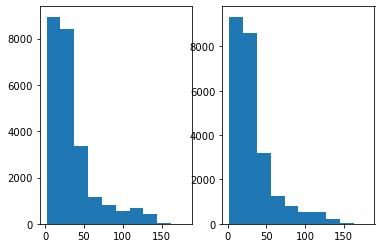

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.hist(t_l_0)
ax2.hist(t_l_1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='document', ylabel='Density'>

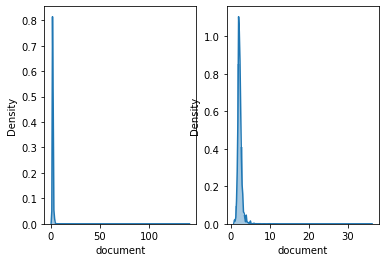

In [46]:
fig,(ax1,ax2)=plt.subplots(1,2)
t_l_0=df_d[df_d.label==0]['document'].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(t_l_0.map(lambda x : np.mean(x)),ax=ax1)
t_l_1=df_d[df_d.label==1]['document'].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(t_l_1.map(lambda x : np.mean(x)),ax=ax2)

In [47]:
def N_그램_표현(t,n,g):
    tv=CountVectorizer(ngram_range=(g,g)).fit(t)
    BoW=tv.transform(t)
    sum_Bow=BoW.sum(axis=0)
    w_f=[(w,sum_Bow[0,i]) for w,i in tv.vocabulary_.items()]
    w_f=sorted(w_f,key=lambda x:x[1], reverse=True)
    return w_f[:n]
ck1_data=dict(N_그램_표현(df_d.document,20,1))

In [48]:
import plotly.express as px

In [49]:
ck1_data

{'진짜': 2927,
 '평점': 2210,
 '연기': 2161,
 '최고': 1950,
 '생각': 1824,
 '이런': 1749,
 '스토리': 1696,
 '드라마': 1642,
 '사람': 1641,
 '감동': 1631,
 '보고': 1550,
 '감독': 1411,
 '배우': 1401,
 'ㅋㅋ': 1383,
 '그냥': 1350,
 '내용': 1347,
 '까지': 1336,
 '재미': 1306,
 '보다': 1303,
 '시간': 1279}

In [50]:
v_df=pd.DataFrame(columns=['c_w','n'])
v_df['c_w']=list(ck1_data.keys())
v_df['n']=list(ck1_data.values())
v_df

,c_w,n
0,진짜,2927
1,평점,2210
2,연기,2161
3,최고,1950
4,생각,1824
5,이런,1749
6,스토리,1696
7,드라마,1642
8,사람,1641
9,감동,1631


In [51]:
fig=px.bar(v_df,x='n',y='c_w',orientation='h',title='c_w_n',color='c_w')#orientation:동작 형식
fig.show()

In [52]:
ck2_data=dict(N_그램_표현(df_d.document,20,2))
v_df1=pd.DataFrame(columns=['c_w','n'])
v_df1['c_w']=list(ck2_data.keys())
v_df1['n']=list(ck2_data.values())
fig=px.bar(v_df1,x='n',y='c_w',orientation='h',title='c_w_n',color='c_w')#orientation:동작 형식
fig.show()

In [53]:
ck2_data=dict(N_그램_표현(df_d.document,20,3))
v_df1=pd.DataFrame(columns=['c_w','n'])
v_df1['c_w']=list(ck2_data.keys())
v_df1['n']=list(ck2_data.values())
fig=px.bar(v_df1,x='n',y='c_w',orientation='h',title='c_w_n',color='c_w')#orientation:동작 형식
fig.show()

In [54]:
t_l_0_s=df_d[df_d.label==0]['document']
t_l_1_s=df_d[df_d.label==1]['document']

In [55]:
t_l_0_data=dict(N_그램_표현(t_l_0_s,20,1))
v_df2=pd.DataFrame(columns=['c_w','n'])
v_df2['c_w']=list(t_l_0_data.keys())
v_df2['n']=list(t_l_0_data.values())
fig=px.bar(v_df2,x='n',y='c_w',orientation='h',title='t_0_c_g',color='c_w')#orientation:동작 형식
fig.show()

In [56]:
t_l_0_data=dict(N_그램_표현(t_l_0_s,20,2))
v_df2=pd.DataFrame(columns=['c_w','n'])
v_df2['c_w']=list(t_l_0_data.keys())
v_df2['n']=list(t_l_0_data.values())
fig=px.bar(v_df2,x='n',y='c_w',orientation='h',title='t_0_c_g',color='c_w')#orientation:동작 형식
fig.show()

In [57]:
t_l_0_data=dict(N_그램_표현(t_l_0_s,20,3))
v_df2=pd.DataFrame(columns=['c_w','n'])
v_df2['c_w']=list(t_l_0_data.keys())
v_df2['n']=list(t_l_0_data.values())
fig=px.bar(v_df2,x='n',y='c_w',orientation='h',title='t_0_c_g',color='c_w')#orientation:동작 형식
fig.show()

In [58]:
t_l_0_data=dict(N_그램_표현(t_l_1_s,20,1))
v_df2=pd.DataFrame(columns=['c_w','n'])
v_df2['c_w']=list(t_l_0_data.keys())
v_df2['n']=list(t_l_0_data.values())
fig=px.bar(v_df2,x='n',y='c_w',orientation='h',title='t_1_c_g',color='c_w')#orientation:동작 형식
fig.show()

In [59]:
t_l_0_data=dict(N_그램_표현(t_l_1_s,20,2))
v_df2=pd.DataFrame(columns=['c_w','n'])
v_df2['c_w']=list(t_l_0_data.keys())
v_df2['n']=list(t_l_0_data.values())
fig=px.bar(v_df2,x='n',y='c_w',orientation='h',title='t_1_c_g',color='c_w')#orientation:동작 형식
fig.show()

In [60]:
t_l_0_data=dict(N_그램_표현(t_l_1_s,20,3))
v_df2=pd.DataFrame(columns=['c_w','n'])
v_df2['c_w']=list(t_l_0_data.keys())
v_df2['n']=list(t_l_0_data.values())
fig=px.bar(v_df2,x='n',y='c_w',orientation='h',title='t_1_c_g',color='c_w')#orientation:동작 형식
fig.show()

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer 

In [64]:
tk_d=Tokenizer()
tk_d.fit_on_texts(df_d.document)
len(tk_d.word_index),tk_d.word_index

(54240,
 {'진짜': 1,
  '적': 2,
  '로': 3,
  '점': 4,
  '평점': 5,
  '연기': 6,
  '것': 7,
  '과': 8,
  '내': 9,
  '최고': 10,
  '그': 11,
  '인': 12,
  '잘': 13,
  '안': 14,
  '나': 15,
  '와': 16,
  '생각': 17,
  '이런': 18,
  '게': 19,
  '못': 20,
  '왜': 21,
  '스토리': 22,
  '드라마': 23,
  '사람': 24,
  '감동': 25,
  '보고': 26,
  '때': 27,
  '더': 28,
  '고': 29,
  '말': 30,
  '감독': 31,
  '배우': 32,
  'ㅋㅋ': 33,
  '아': 34,
  '그냥': 35,
  '내용': 36,
  '거': 37,
  '까지': 38,
  '중': 39,
  '재미': 40,
  '보다': 41,
  '본': 42,
  '시간': 43,
  '없는': 44,
  '좀': 45,
  '뭐': 46,
  '수': 47,
  '지': 48,
  '봤는데': 49,
  '쓰레기': 50,
  '사랑': 51,
  '볼': 52,
  '작품': 53,
  '다시': 54,
  '하나': 55,
  '없다': 56,
  '할': 57,
  '마지막': 58,
  'ㅠㅠ': 59,
  '이건': 60,
  '저': 61,
  '같은': 62,
  '정도': 63,
  '있는': 64,
  '좋은': 65,
  '완전': 66,
  '처음': 67,
  'ㅋ': 68,
  '장면': 69,
  '주인공': 70,
  'ㅋㅋㅋ': 71,
  '이렇게': 72,
  '입니다': 73,
  '액션': 74,
  '하': 75,
  '최악': 76,
  '걸': 77,
  '보는': 78,
  '이야기': 79,
  '지금': 80,
  '끝': 81,
  'ㅡㅡ': 82,
  '연출': 83,
  '없고': 84,
  '임': 85,
  '개':

In [ ]:
np.unique()